In [236]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import csv

In [237]:
class BankCard:
    def __init__(self, last_name, card_number, card_sum):
        self.last_name = last_name
        self.card_number = card_number
        self.card_sum = card_sum

    @property
    def last_name(self):
        return self._last_name

    @last_name.setter
    def last_name(self, val):
        if val == "" or not(isinstance(val, str)):
            self._last_name = "last_name"
        else:
            self._last_name = val
    
    @property
    def card_number(self):
        return self._card_number

    @card_number.setter
    def card_number(self, val):
        if not isinstance(val, int):
            raise TypeError('card_number must be an int')
        self._card_number = val

    @property
    def card_sum(self):
        return self._card_sum

    @card_sum.setter
    def card_sum(self, val):
        if not isinstance(val, int):
            raise TypeError('card_sum must be an int')
        self._card_sum = val

    def __str__(self):
        return f'last name = {self.last_name}, card number = {self.card_number}, card sum = ${self.card_sum}'

    def __repr__(self):
        return f'last_name={self.last_name}, card_number={self.card_number}, card_sum={self.card_sum}'

### Task 1

In [238]:
bankCard_data = {}
with open('bankCard.csv', 'r') as bc:
    reader = csv.reader(bc)
    next(reader)
    for row in reader:
        bankCard_data.update({row[0]: BankCard(row[0], int(row[1]), int(row[2]))})

for i in sorted(bankCard_data):
    print(bankCard_data[i])

last name = Boyle, card number = 5972, card sum = $23604
last name = Crona, card number = 8582, card sum = $8771
last name = Gibson, card number = 3985, card sum = $61132
last name = Hodkiewicz, card number = 2657, card sum = $25544
last name = Kreiger, card number = 9606, card sum = $22089
last name = Mueller, card number = 2503, card sum = $22495
last name = O'Reilly, card number = 6573, card sum = $29901
last name = Quitzon, card number = 5740, card sum = $16380
last name = Stanton, card number = 4364, card sum = $64164


### Task 2

In [239]:
def f(last_name):
    return f'card number is: {last_name.card_number} and sum is: {last_name.card_sum}'

interact(f, last_name=bankCard_data);

interactive(children=(Dropdown(description='last_name', options={'Quitzon': last_name=Quitzon, card_number=574…

### Task 3

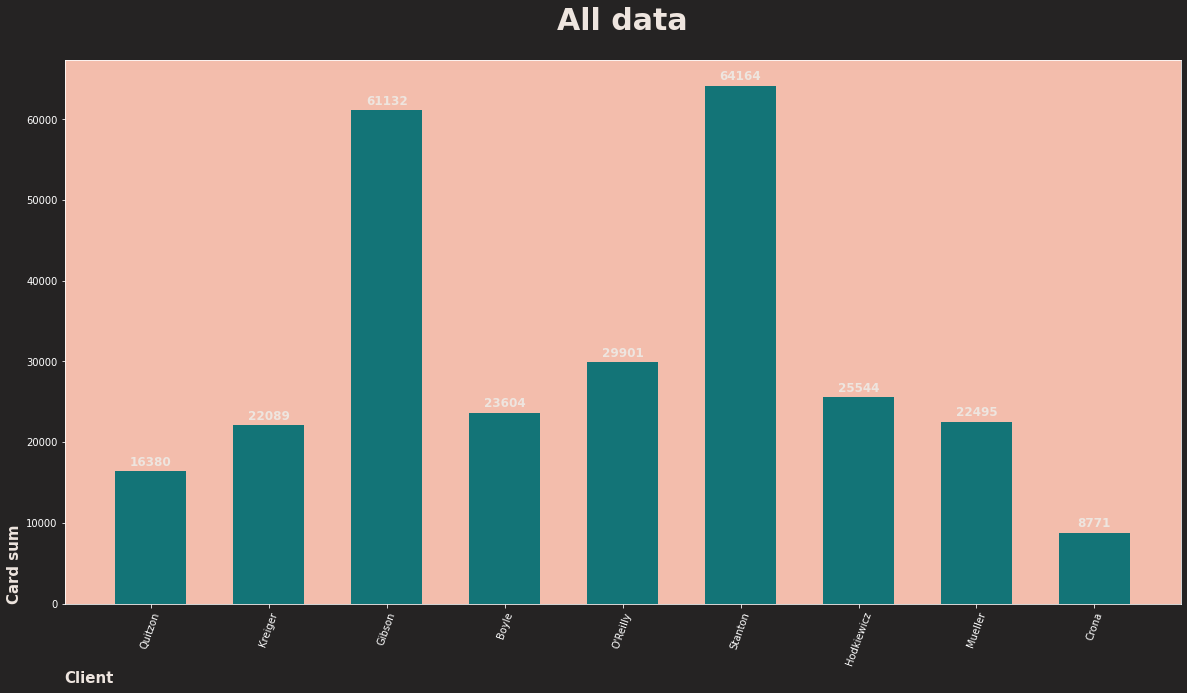

In [247]:
x = [x for x in bankCard_data.keys()]
y = [x.card_sum for x in bankCard_data.values() ] 

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 10))
rect = ax.bar(x, y, color='#137477', width=0.6,)
ax.set_ylabel('Card sum', color='#eee5df', position=(1e6, 0.), horizontalalignment='left', size=15,fontweight='bold')
ax.set_xlabel('Client', color='#eee5df', horizontalalignment='left', position=(0., 1e6), size=15,fontweight='bold')
ax.set_title('All data', color='#eee5df', size=30,fontweight='bold', pad=30)
ax.patch.set_facecolor('#f3bdac')
fig.patch.set_facecolor('#252323')
fig.patch.set_edgecolor('#252323')
ax.tick_params(axis='x', rotation=70,)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',color='#eee5df',size=12,fontweight='bold' )
autolabel(rect)
plt.show()